In [1]:
library(data.table)
library(readxl)
library(stringr)
library(ggplot2)
library(gridExtra)
library(cowplot)

In [2]:
color_AD <- "#FF3300"
color_ND <- "blue"
color_CHC <- "#FFCC00"

In [3]:
setwd("~/ownCloud/Meng/")

In [4]:
path <- "100_plus_project/100plus_data_Frank_2019-07-09/peptide data.tsv"
raw_data <- read.table(path, header=T, stringsAsFactors=F, sep = "\t")
#dim(raw_data)

In [5]:
peptide_quality <- raw_data[,c(1, 2, grep("qvalue_", colnames(raw_data)))]
peptide_intensity <- raw_data[,c(1, 2, grep("intensity_", colnames(raw_data)))]

In [6]:
load(file = "100_plus_project/Metadata/exclude_file_names_20220901.Rdata")

In [7]:
paste("qvalue", exclude_file_names, sep = "_")

[1] "qvalue_20190401_9_S93_025_AD_057"     
 [2] "qvalue_20190424_20_S00_166_AD_177"    
 [3] "qvalue_20190326_28_S01_297_AD_018"    
 [4] "qvalue_20190419_44_01_328_AD_126"     
 [5] "qvalue_20190419_40_S02_231_AD_124"    
 [6] "qvalue_20190412_7_S03_150_AD_079"     
 [7] "qvalue_20190326_177_S04_062_AD_023"   
 [8] "qvalue_20190415_64_04_088_AD_94"      
 [9] "qvalue_20190502_2_S05_265_AD_194"     
[10] "qvalue_20190401_11_S06_264_AD_055"    
[11] "qvalue_20190419_41_S07_116_AD_143"    
[12] "qvalue_20190507_199_S07_308_ND_222"   
[13] "qvalue_20190606_98_S08_153_ND_RERUN"  
[14] "qvalue_20190606_81_S09_128_ND_RERUN"  
[15] "qvalue_20190606_85_S09_244_ND_RERUN"  
[16] "qvalue_20190507_207_S11_039_ND_206"   
[17] "qvalue_20190419_83_S12_005_ND_129"    
[18] "qvalue_20190507_76_S12_049_ND_214"    
[19] "qvalue_20190502_86_S12_086_ND_188"    
[20] "qvalue_20190412_84_S12_088_ND_078"    
[21] "qvalue_20190606_78_S14_029_ND_RERUN"  
[22] "qvalue_20190606_128_S16_107_CHC_RERUN"
[23] "qvalue_20190411_132_2016_139_CHC_068" 
[24] "qvalue_20190401_140_2017_027_CHC_056" 
[25] "qvalue_20190404_141_2017_028_CHC_063" 
[26] "qvalue_20190401_106_NABCA14_08_ND_058"
[27] "qvalue_20190416_98_S08_153_ND_101"

In [8]:
peptide_quality <- peptide_quality[, -which(colnames(peptide_quality) %in% paste("qvalue", exclude_file_names, sep = "_"))]

In [9]:
peptide_intensity <- peptide_intensity[, -which(colnames(peptide_intensity) %in% paste("intensity", exclude_file_names, sep = "_"))]

In [10]:
## Check if we need to keep the peptides that has NA data, these protein all have lots of peptides and 
## the NA_peptides always have a relative low intensity. So remove!!!

In [11]:
##There are 4 peptides with missing value and 13 peptides does not have protein name
##So I remove them all
incomplete_peptide <- which(!complete.cases(peptide_intensity[3:ncol(peptide_intensity)]))
#incomplete_peptide
NA_protein <- which(is.na(peptide_quality$protein))
#NA_protein

In [12]:
peptide_intensity[incomplete_peptide,][, colSums(is.na(peptide_intensity[incomplete_peptide,])) > 0]

,intensity_20190328_130_S16_109_CHC_034,intensity_20190502_54_S02_121_AD_196,intensity_20190502_71_05_044_AD_191
,<dbl>,<dbl>,<dbl>
10694,NA,2.489487,1.000000
12487,7.201293,NA,5.957765
25260,12.604773,7.558548,NA


In [13]:
## Check if we need to keep the peptides that has NA data, these protein all have lots of peptides and 
## the NA_peptides always have a relative low intensity. So remove!!!

In [14]:
##There are 4 peptides with missing value and 13 peptides does not have protein name
##So I remove them all
incomplete_peptide <- which(!complete.cases(peptide_intensity[3:ncol(peptide_intensity)]))
#incomplete_peptide
NA_protein <- which(is.na(peptide_quality$protein))
#NA_protein

peptide_quality <- peptide_quality[-c(NA_protein, incomplete_peptide), ]
peptide_intensity <- peptide_intensity[-c(NA_protein, incomplete_peptide), ]

In [15]:
dim(peptide_quality)
dim(peptide_intensity)

[1] 28192   212

[1] 28192   212

In [16]:
length(unique(peptide_intensity$protein))

[1] 4829

In [17]:
metadata <- read_excel("100_plus_project/Metadata/2019_07_23_Proteomics_Metadata_forMeng_v4.xlsx",sheet=1,col_names=TRUE, na="NA")
metadata <- as.data.frame(metadata)
names_sample <- as.array(colnames(peptide_intensity)[3:ncol(peptide_intensity)])
names_sample <- as.vector(apply(names_sample, 1, function(names){return (str_sub(names, 11))}))

filenames_map_index <- integer(length(names_sample))
for (i in 1:length(names_sample)){
    filenames_map_index[i] <- ifelse(length(which(metadata[,"Mass-Spec filenames (1)"] == names_sample[i]))==0,
                                     which(metadata[,"Mass-Spec filenames (2)"] == names_sample[i]), 
                                     which(metadata[,"Mass-Spec filenames (1)"] == names_sample[i]))
}

New names:
• `autopsy` -> `autopsy...3`
• `GROUP` -> `GROUP...4`
• `Snumber` -> `Snumber...8`
• `Snumber` -> `Snumber...16`
• `GROUP` -> `GROUP...17`
• `tissuecode` -> `tissuecode...19`
• `autopsy` -> `autopsy...22`
• `tissuecode` -> `tissuecode...35`
• `` -> `...51`

In [18]:
length(names_sample)
length(filenames_map_index)

[1] 210

[1] 210

In [20]:
table(metadata[filenames_map_index, ]$"GROUP...4")


 AD CHC  ND 
 91  58  61 

In [21]:
peptide_intens_plot <- data.frame(intens = log2(unlist(peptide_intensity[, -c(1, 2)])))
peptide_intens_plot$sample_id <- as.vector(sapply(1:(ncol(peptide_intensity) - 2), rep, nrow(peptide_intensity)))
rownames(peptide_intens_plot) <- NULL

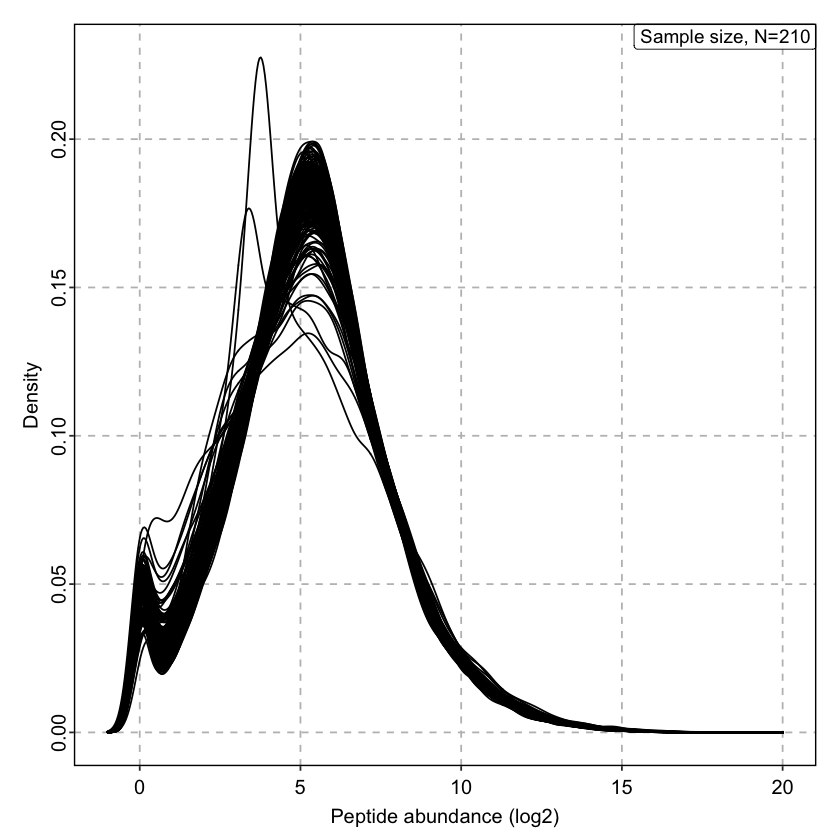

In [22]:
##Plot initial intensity distribution
#pdf("Intensity_distribution_plot_for_all_samples.pdf")
p_1 <- ggplot(peptide_intens_plot, aes(x = intens, group = sample_id)) +
    geom_density() +

    xlab("Peptide abundance (log2)") +
    ylab("Density") + 

    xlim(-1, 20) +

    annotate("label", x = Inf, y = Inf, vjust = 1, hjust = 1, size = 4,
             label = paste("Sample size, N=", max(peptide_intens_plot$sample_id), sep = "")) +

    theme(#plot.background = element_rect(),    # Background of the entire plot
          panel.background = element_rect(fill = "white"),   # Background of plotting area
          panel.border = element_rect(fill = NA,
                                      colour = "black",
                                      size = 0.8),       # Border around plotting area.
                                               # fill argument should be NA
  
          legend.box.background = element_rect(0.6),
          legend.position = c(0, 1),
          legend.justification = c("left", "top"),
          legend.box.just = "center",
          legend.box.margin = margin(10, 10, 10, 10),
          
  
          panel.grid.major.x = element_line(size = 0.5, linetype = 'dashed',
                                color = "gray"), # Vertical major grid lines
          panel.grid.major.y = element_line(size = 0.5, linetype = 'dashed',
                                color = "gray"), # Horizontal major grid lines
          panel.grid.minor.x = element_line(), # Vertical minor grid lines
          panel.grid.minor.y = element_line(),  # Vertical ma1jor grid lines
        
          plot.title = element_text(hjust = 0.5),
          axis.title.x = element_text(color = "black", size = 12, vjust = -1.5),
          axis.title.y = element_text(color = "black", size = 12),
          
          axis.text.x = element_text(size = 12, color = "black", 
                                     vjust = 0, hjust = 0.5),
          axis.text.y = element_text(size = 12, color = "black",
                                     vjust = 0, hjust = 0.5, angle=90),
          #axis.ticks = element_blank()
          plot.margin = unit(c(0.5, 0.5, 0.5, 0.5), "cm")
          
         )
p_1
#dev.off()

In [23]:
cat("It may be due to technical reasons or the sample itself, some samples have unusually large amounts of low quality peptides. So here is the first step, we set a threshold to filter samples with too many low quality peptides.")

It may be due to technical reasons or the sample itself, some samples have unusually large amounts of low quality peptides. So here is the first step, we set a threshold to filter samples with too many low quality peptides.

In [40]:
##remove samples with #(low quality peptide) > 34% 
threshold_1 = 0.34
cal_low_quality_num <- function(peptide_quality){
    return(length(which(peptide_quality>0.01)))
}
low_quality_num_psamp <- apply(peptide_quality[3:ncol(peptide_quality)], 2, cal_low_quality_num)
low_quality_num_psamp <- data.frame(num=low_quality_num_psamp)

low_quality_num_psamp$ratio <- low_quality_num_psamp$num/nrow(peptide_quality)
low_quality_sample_index <- which(low_quality_num_psamp$ratio>threshold_1)

low_quality_num_psamp$filter <- "no"
low_quality_num_psamp[low_quality_sample_index, ]$filter <- "yes"

#length(low_quality_sample_index)

#group <- colnames(peptide_intensity[3:ncol(peptide_intensity)])
#group[grep("CHC", group)] <- "CHC"
#group[grep("AD", group)] <- "AD"
#group[grep("ND", group)] <- "ND"

low_quality_num_psamp$group <- factor(metadata[filenames_map_index,][,c("GROUP...4")], levels=c("AD", "ND", "CHC"))

low_quality_num_psamp$IHClabel <- metadata[filenames_map_index,][,c("IHC nr")]
low_quality_num_psamp[which(low_quality_num_psamp$ratio<threshold_1),]$IHClabel <- ""
low_quality_num_psamp <- low_quality_num_psamp[order(low_quality_num_psamp$num),]
low_quality_num_psamp$index <- 1:nrow(low_quality_num_psamp)

In [41]:
table(low_quality_num_psamp$IHClabel != "")


FALSE  TRUE 
  191    19 

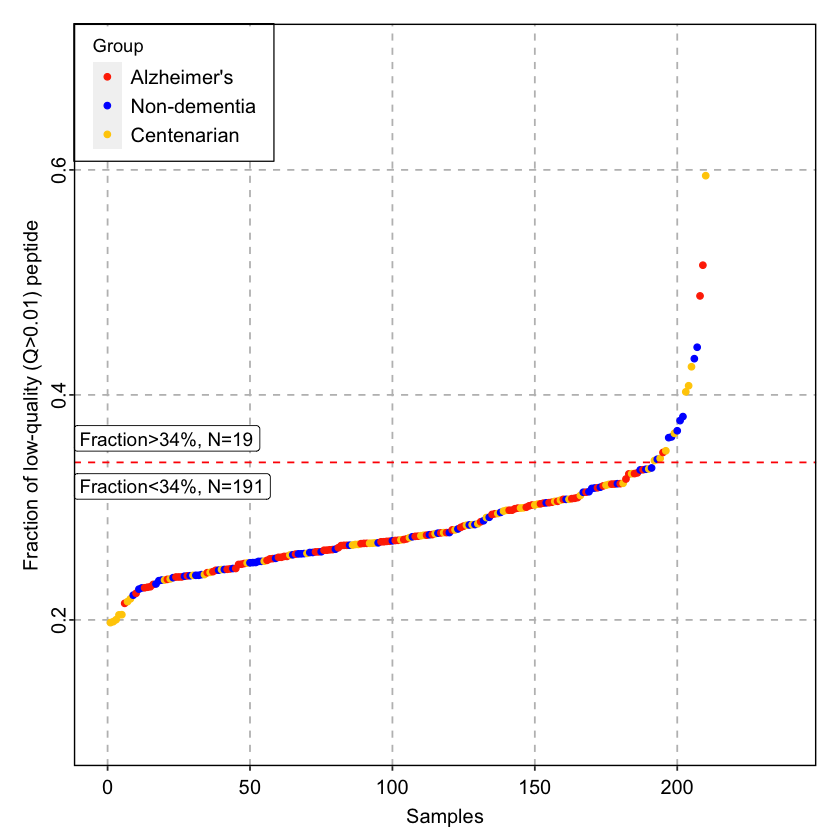

In [43]:
#pdf("Low_quality_peptide_ratio_of_samples.pdf")
#par(mar=c(1,3,1,3))
p_2 <- ggplot(low_quality_num_psamp, aes(index, ratio)) +
    geom_point(aes(colour = factor(group)))+
    labs(x="Samples", y="Fraction of low-quality (Q>0.01) peptide", 
         #title = "Low quality (>0.01) peptide ratio distribution of samples", 
         color='Group') +

    xlim(0, 237) +
    ylim(0.1, 0.7) +
    #coord_fixed(ratio=400) + 

    scale_color_manual(name='Group', values = c(color_AD, color_ND, color_CHC), 
                       labels = c("Alzheimer's", "Non-dementia", "Centenarian"))+

    annotate("label", x = -Inf, y = 0.35, vjust = 0, hjust = 0, size = 4,
             label = paste("Fraction>34%, N=", length(low_quality_sample_index), sep = "")) +

    annotate("label", x = -Inf, y = 0.33, vjust = 1, hjust = 0, size = 4,
             label = paste("Fraction<34%, N=", 
                           nrow(low_quality_num_psamp) - length(low_quality_sample_index), sep = "")) +

    #geom_text(aes(x=index, y=ratio, label = IHClabel, vjust = 1.1, hjust = -0.5), size=2.5) +
    geom_hline(aes(yintercept=threshold_1), colour="red", linetype="dashed") +
    theme(#plot.background = element_rect(),    # Background of the entire plot
          panel.background = element_rect(fill = "white"),   # Background of plotting area
          panel.border = element_rect(fill = NA,
                                      colour = "black",
                                      size = 0.8),       # Border around plotting area.
                                               # fill argument should be NA
  
          legend.box.background = element_rect(0.6),
          legend.position = c(0, 1),
          legend.justification = c("left", "top"),
          legend.box.just = "center",
          legend.box.margin = margin(t = 2, r = 2, b = 2, l = 6),
        
          legend.text = element_text(size = 12, color = "black"),
          
  
          panel.grid.major.x = element_line(size = 0.5, linetype = 'dashed',
                                color = "gray"), # Vertical major grid lines
          panel.grid.major.y = element_line(size = 0.5, linetype = 'dashed',
                                color = "gray"), # Horizontal major grid lines
          panel.grid.minor.x = element_line(), # Vertical minor grid lines
          panel.grid.minor.y = element_line(),  # Vertical ma1jor grid lines
        
          plot.title = element_text(hjust = 0.5),
          axis.title.x = element_text(color = "black", size = 12, vjust = -1.5),
          axis.title.y = element_text(color = "black", size = 12),
          
          axis.text.x = element_text(size = 12, color = "black", 
                                     vjust = 0, hjust = 0.5),
          axis.text.y = element_text(size = 12, color = "black",
                                     vjust = 0, hjust = 0.5, angle=90),
          #axis.ticks = element_blank()
          plot.margin = unit(c(0.5, 0.5, 0.5, 0.5), "cm")
          
          #axis.line = element_line(size = 0.5, linetype = "solid",
                                   #colour = "black")
         )
p_2

#dev.off()

In [44]:
high_quality_sample_index <- setdiff(3:ncol(peptide_intensity), low_quality_sample_index+2)

In [45]:
cat("In this step, ", length(low_quality_sample_index), " samples with low quality peptide ratio greater than ", threshold_1 * 100,
    "% will be removed.", sep="") 

In this step, 19 samples with low quality peptide ratio greater than 34% will be removed.

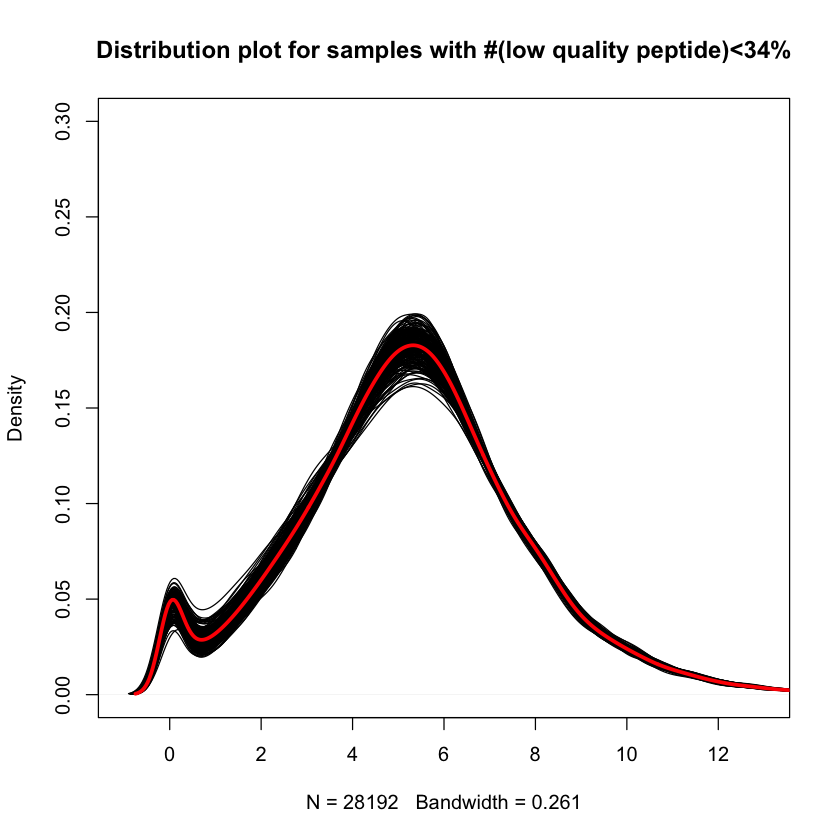

In [46]:
##Plot intensity distribution for samples with low quality peptide number <34%
plot(density(log2(peptide_intensity[,high_quality_sample_index[1]])), xlim=c(-1, 13), ylim=c(0, 0.3), 
     main="Distribution plot for samples with #(low quality peptide)<34%")
for (i in high_quality_sample_index){
    lines(density(log2(peptide_intensity[,i])))
}
lines(density(as.vector(t(apply(log2(peptide_intensity[high_quality_sample_index]), 2, as.numeric))), 
              width = 1), col="red", lwd = 3)


In [47]:
cat("The intensity distribution plot of remaining samples is above.
Filtering based on the ratio of low quality peptides can roughly remove low quality samples, 
and the curve of intensity distribution will be more concentrated and compact.")
cat("\n\n\n")
cat("After filtering, we can keep ", length(high_quality_sample_index), " samples, and group distribution is as follows:")

The intensity distribution plot of remaining samples is above.
Filtering based on the ratio of low quality peptides can roughly remove low quality samples, 
and the curve of intensity distribution will be more concentrated and compact.


After filtering, we can keep  191  samples, and group distribution is as follows:

In [58]:
#sample_distribution_table <- data.frame(AD = c(length(grep("AD", colnames(peptide_intensity)[low_quality_sample_index+2])),
#                                               length(grep("AD", colnames(peptide_intensity)[high_quality_sample_index]))),
#                                        CHC = c(length(grep("CHC", colnames(peptide_intensity)[low_quality_sample_index+2])),
#                                               length(grep("CHC", colnames(peptide_intensity)[high_quality_sample_index]))),
#                                        ND = c(length(grep("ND", colnames(peptide_intensity)[low_quality_sample_index+2])),
#                                               length(grep("ND", colnames(peptide_intensity)[high_quality_sample_index]))))
#
#sample_distribution_table$total <- rowSums(sample_distribution_table)
#sample_distribution_table <- rbind(sample_distribution_table, colSums(sample_distribution_table))
#rownames(sample_distribution_table) <- c("low_quality_peptide>34%", "low_quality_peptide<=34%", "total")
#sample_distribution_table

In [49]:
sample_distribution_table <- data.frame(AD = c(nrow(subset(low_quality_num_psamp, (filter == "yes") & (group == "AD"))),
                                               nrow(subset(low_quality_num_psamp, (filter == "no") & (group == "AD")))),
                                        CHC = c(nrow(subset(low_quality_num_psamp, (filter == "yes") & (group == "CHC"))),
                                               nrow(subset(low_quality_num_psamp, (filter == "no") & (group == "CHC")))),
                                        ND = c(nrow(subset(low_quality_num_psamp, (filter == "yes") & (group == "ND"))),
                                               nrow(subset(low_quality_num_psamp, (filter == "no") & (group == "ND")))))

sample_distribution_table$total <- rowSums(sample_distribution_table)
sample_distribution_table <- rbind(sample_distribution_table, colSums(sample_distribution_table))
rownames(sample_distribution_table) <- c("low_quality_peptide>34%", "low_quality_peptide<=34%", "total")
sample_distribution_table

,AD,CHC,ND,total
,<dbl>,<dbl>,<dbl>,<dbl>
low_quality_peptide>34%,3,8,8,19
low_quality_peptide<=34%,88,50,53,191
total,91,58,61,210


In [50]:
cat("In order to check whether these filtered samples are highly correlated with certain groups,
we perform Chi-squared test here.")
chisq.test(sample_distribution_table[1:2,][1:3])

In order to check whether these filtered samples are highly correlated with certain groups,
we perform Chi-squared test here.


	Pearson's Chi-squared test

data:  sample_distribution_table[1:2, ][1:3]
X-squared = 6.4708, df = 2, p-value = 0.03934


In [51]:
cat("From Chi-squared test we can find p-value = 0.01222 (<0.05), seems dependent, 
but some of these removed samples are re-run samples. 
If we test the relationship between re-run samples and group, 
then the relationship is not significant.
One question should be mentioned here is that more than half of the samples 
with high ratio of low quality peptide still get lots of low quality peptides after re-run.")

From Chi-squared test we can find p-value = 0.01222 (<0.05), seems dependent, 
but some of these removed samples are re-run samples. 
If we test the relationship between re-run samples and group, 
then the relationship is not significant.
One question should be mentioned here is that more than half of the samples 
with high ratio of low quality peptide still get lots of low quality peptides after re-run.

In [52]:
#sample_distribution_table <- data.frame(AD = c(5, 95), CHC = c(7, 58), ND = c(4, 55))
#chisq.test(sample_distribution_table)

In [53]:
cat("Data distribution is a good tool to compare sample differences. 
In this step, we will use peptide intansity of all samples (remained from last step) 
to get an overall distribution. 
Then calculate the distance between each single sample distribution and overall distribution 
using \"Kolmogorov–Smirnov test\". 
Sample with a large distribution distance should have more outliers compared with others. 
So we can remove samples with large distribution distance.")

Data distribution is a good tool to compare sample differences. 
In this step, we will use peptide intansity of all samples (remained from last step) 
to get an overall distribution. 
Then calculate the distance between each single sample distribution and overall distribution 
using "Kolmogorov–Smirnov test". 
Sample with a large distribution distance should have more outliers compared with others. 
So we can remove samples with large distribution distance.

In [54]:
##Start to perform filtering by distribution distance
all = as.vector(t(apply(log2(peptide_intensity[high_quality_sample_index]), 2, as.numeric)))
peptide_dist <- numeric(0)
for (i in high_quality_sample_index){
    temp <- ks.test(log2(as.numeric(peptide_intensity[,i])), y=all, alternative="two.sided")$statistic
    peptide_dist <- c(peptide_dist, temp)
}
length(peptide_dist)

Warning message in ks.test(log2(as.numeric(peptide_intensity[, i])), y = all, alternative = "two.sided"):
“p-value will be approximate in the presence of ties”Warning message in ks.test(log2(as.numeric(peptide_intensity[, i])), y = all, alternative = "two.sided"):
“p-value will be approximate in the presence of ties”Warning message in ks.test(log2(as.numeric(peptide_intensity[, i])), y = all, alternative = "two.sided"):
“p-value will be approximate in the presence of ties”Warning message in ks.test(log2(as.numeric(peptide_intensity[, i])), y = all, alternative = "two.sided"):
“p-value will be approximate in the presence of ties”Warning message in ks.test(log2(as.numeric(peptide_intensity[, i])), y = all, alternative = "two.sided"):
“p-value will be approximate in the presence of ties”Warning message in ks.test(log2(as.numeric(peptide_intensity[, i])), y = all, alternative = "two.sided"):
“p-value will be approximate in the presence of ties”Warning message in ks.test(log2(as.numeric(pep

“p-value will be approximate in the presence of ties”Warning message in ks.test(log2(as.numeric(peptide_intensity[, i])), y = all, alternative = "two.sided"):
“p-value will be approximate in the presence of ties”Warning message in ks.test(log2(as.numeric(peptide_intensity[, i])), y = all, alternative = "two.sided"):
“p-value will be approximate in the presence of ties”Warning message in ks.test(log2(as.numeric(peptide_intensity[, i])), y = all, alternative = "two.sided"):
“p-value will be approximate in the presence of ties”Warning message in ks.test(log2(as.numeric(peptide_intensity[, i])), y = all, alternative = "two.sided"):
“p-value will be approximate in the presence of ties”Warning message in ks.test(log2(as.numeric(peptide_intensity[, i])), y = all, alternative = "two.sided"):
“p-value will be approximate in the presence of ties”Warning message in ks.test(log2(as.numeric(peptide_intensity[, i])), y = all, alternative = "two.sided"):
“p-value will be approximate in the presence o

“p-value will be approximate in the presence of ties”Warning message in ks.test(log2(as.numeric(peptide_intensity[, i])), y = all, alternative = "two.sided"):
“p-value will be approximate in the presence of ties”Warning message in ks.test(log2(as.numeric(peptide_intensity[, i])), y = all, alternative = "two.sided"):
“p-value will be approximate in the presence of ties”Warning message in ks.test(log2(as.numeric(peptide_intensity[, i])), y = all, alternative = "two.sided"):
“p-value will be approximate in the presence of ties”Warning message in ks.test(log2(as.numeric(peptide_intensity[, i])), y = all, alternative = "two.sided"):
“p-value will be approximate in the presence of ties”Warning message in ks.test(log2(as.numeric(peptide_intensity[, i])), y = all, alternative = "two.sided"):
“p-value will be approximate in the presence of ties”Warning message in ks.test(log2(as.numeric(peptide_intensity[, i])), y = all, alternative = "two.sided"):
“p-value will be approximate in the presence o

“p-value will be approximate in the presence of ties”Warning message in ks.test(log2(as.numeric(peptide_intensity[, i])), y = all, alternative = "two.sided"):
“p-value will be approximate in the presence of ties”Warning message in ks.test(log2(as.numeric(peptide_intensity[, i])), y = all, alternative = "two.sided"):
“p-value will be approximate in the presence of ties”Warning message in ks.test(log2(as.numeric(peptide_intensity[, i])), y = all, alternative = "two.sided"):
“p-value will be approximate in the presence of ties”Warning message in ks.test(log2(as.numeric(peptide_intensity[, i])), y = all, alternative = "two.sided"):
“p-value will be approximate in the presence of ties”Warning message in ks.test(log2(as.numeric(peptide_intensity[, i])), y = all, alternative = "two.sided"):
“p-value will be approximate in the presence of ties”Warning message in ks.test(log2(as.numeric(peptide_intensity[, i])), y = all, alternative = "two.sided"):
“p-value will be approximate in the presence o

[1] 191

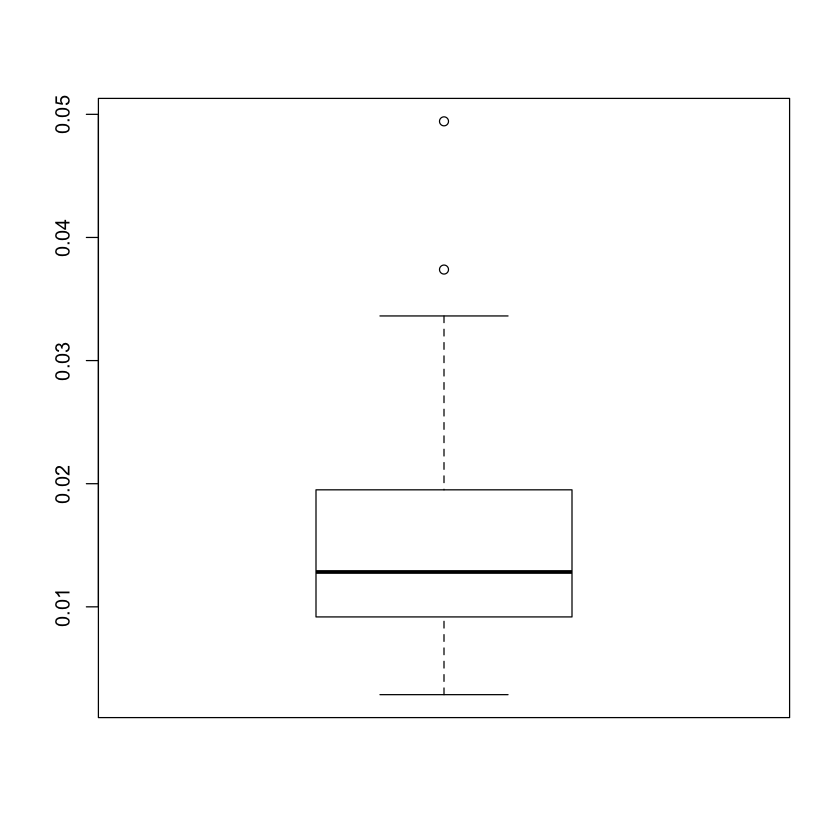

In [55]:
boxplot(peptide_dist)

In [56]:
quantile(peptide_dist, probs = c(0.75)) + 2*IQR(peptide_dist)

75% 
0.04014748

In [57]:
quantile(peptide_dist, probs = c(0.75)) + 2*IQR(peptide_dist)

75% 
0.04014748

In [59]:
plot_data <- data.frame(dist = peptide_dist, 
                        group = metadata[filenames_map_index[high_quality_sample_index-2],][,c("GROUP...4")],
                        stringsAsFactors = FALSE)

In [61]:
plot_data$filter <- "no"
plot_data[plot_data$dist >0.04, ]$filter <- "yes"

In [62]:
plot_data <- plot_data[order(plot_data$dist), ]
plot_data$index <- 1:nrow(plot_data)
plot_data$group <- factor(plot_data$group, levels = c("AD", "ND", "CHC"))

In [63]:
table(plot_data$group, plot_data$filter)

     
      no yes
  AD  88   0
  ND  53   0
  CHC 49   1

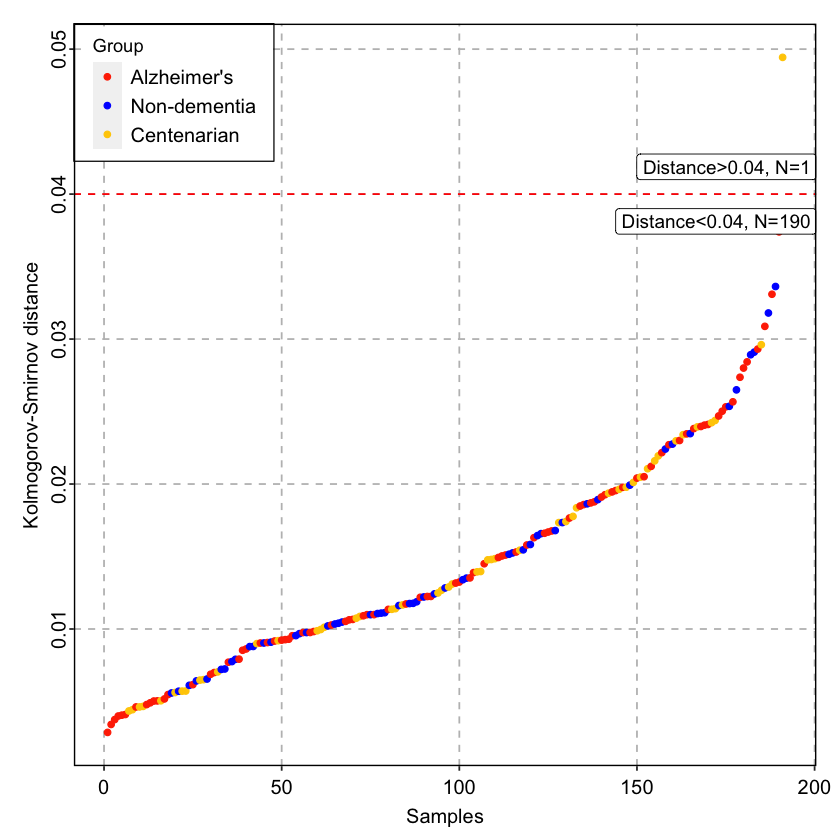

In [75]:
#pdf("Distribution_distance_between_sample_and_average.pdf")
p_3 <- ggplot(plot_data, aes(index, dist)) +
    geom_point(aes(colour = factor(group)))+
    #geom_boxplot() +
    labs(x="Samples", y="Kolmogorov-Smirnov distance", 
         #title = "Low quality (>0.01) peptide ratio distribution of samples", 
         color='Group') +

    #xlim(0, 237) +
    #ylim(0.1, 0.7) +
    #coord_fixed(ratio=400) + 

    scale_color_manual(name='Group', values = c(color_AD, color_ND, color_CHC), 
                       labels = c("Alzheimer's", "Non-dementia", "Centenarian"))+

    annotate("label", x = Inf, y = 0.041, vjust = 0, hjust = 1, size = 4,
             label = paste("Distance>0.04, N=", sum(peptide_dist>0.04), sep = "")) +

    annotate("label", x = Inf, y = 0.039, vjust = 1, hjust = 1, size = 4,
             label = paste("Distance<0.04, N=", 
                           nrow(plot_data) - sum(peptide_dist>0.04), sep = "")) +
    

    geom_hline(aes(yintercept=0.04), colour="red", linetype="dashed") +
    theme(#plot.background = element_rect(),    # Background of the entire plot
          panel.background = element_rect(fill = "white"),   # Background of plotting area
          panel.border = element_rect(fill = NA,
                                      colour = "black",
                                      size = 0.8),       # Border around plotting area.
                                               # fill argument should be NA
  
          legend.box.background = element_rect(0.6),
          legend.position = c(0, 1),
          legend.justification = c("left", "top"),
          legend.box.just = "center",
          legend.box.margin = margin(t = 2, r = 2, b = 2, l = 6),
          
          legend.text = element_text(size = 12, color = "black"),
  
          panel.grid.major.x = element_line(size = 0.5, linetype = 'dashed',
                                color = "gray"), # Vertical major grid lines
          panel.grid.major.y = element_line(size = 0.5, linetype = 'dashed',
                                color = "gray"), # Horizontal major grid lines
          panel.grid.minor.x = element_line(), # Vertical minor grid lines
          panel.grid.minor.y = element_line(),  # Vertical ma1jor grid lines
        
          plot.title = element_text(hjust = 0.5),
          axis.title.x = element_text(color = "black", size = 12, vjust = -1.5),
          axis.title.y = element_text(color = "black", size = 12),
          
          axis.text.x = element_text(size = 12, color = "black", 
                                     vjust = 0, hjust = 0.5),
          axis.text.y = element_text(size = 12, color = "black",
                                     vjust = 0, hjust = 0.5, angle=90),
          #axis.ticks = element_blank()
          plot.margin = unit(c(0.5, 0.5, 0.5, 0.5), "cm")
          
         )
p_3
#dev.off()

In [76]:
cat("Above is a sample distribution distance plot. After setting 0.04 as a threshold, we can remove one sample.") 

Above is a sample distribution distance plot. After setting 0.04 as a threshold, we can remove one sample.

In [77]:
peptide_dist[which(peptide_dist>0.04)]

D 
0.04943124

In [78]:
large_distribution_distance_index <- which(peptide_dist>0.04)
large_distribution_distance_samples_index <- high_quality_sample_index[large_distribution_distance_index]

high_quality_sample_index_s2 <- setdiff(high_quality_sample_index,
                                     large_distribution_distance_samples_index)

In [79]:
peptide_intens_plot_s2 <- data.frame(intens = log2(unlist(peptide_intensity[, high_quality_sample_index_s2])))
peptide_intens_plot_s2$sample_id <- as.vector(sapply(1:length(high_quality_sample_index_s2), 
                                           rep, nrow(peptide_intensity)))
rownames(peptide_intens_plot_s2) <- NULL

In [80]:
colnames(peptide_intensity)[large_distribution_distance_samples_index]

[1] "intensity_20190416_159_2018_038_CHC_106"

### Last check

In [85]:
load(file = "100_plus_project/Metadata/metadata_clean_update20220901.Rdata")

In [88]:
clean_sample_names <- colnames(peptide_intensity)[high_quality_sample_index_s2]
clean_sample_names <- as.array(clean_sample_names)
clean_sample_names <- as.vector(apply(clean_sample_names, 1, function(names){return (str_sub(names, 11))}))

In [91]:
sum(metadata$filenames == clean_sample_names)

[1] 190

### Last check

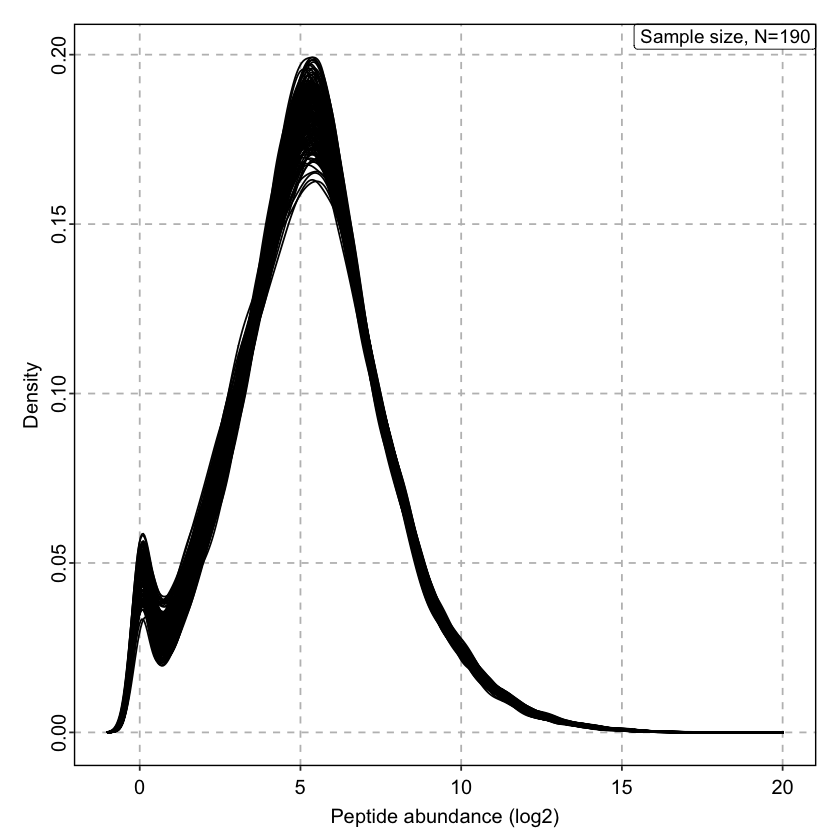

In [81]:
##Plot intensity distribution for samples with low quality peptide number <34% and distribution distance <0.04
#pdf("Intensity_distribution_plot_for_remaining_samples.pdf")
p_4 <- ggplot(peptide_intens_plot_s2, aes(x = intens, group = sample_id)) +
    geom_density() +

    xlab("Peptide abundance (log2)") +
    ylab("Density") + 

    xlim(-1, 20) +

    annotate("label", x = Inf, y = Inf, vjust = 1, hjust = 1, size = 4,
             label = paste("Sample size, N=", max(peptide_intens_plot_s2$sample_id), sep = "")) +

    theme(#plot.background = element_rect(),    # Background of the entire plot
          panel.background = element_rect(fill = "white"),   # Background of plotting area
          panel.border = element_rect(fill = NA,
                                      colour = "black",
                                      size = 0.8),       # Border around plotting area.
                                               # fill argument should be NA
  
          legend.box.background = element_rect(0.6),
          legend.position = c(0, 1),
          legend.justification = c("left", "top"),
          legend.box.just = "center",
          legend.box.margin = margin(10, 10, 10, 10),
          
  
          panel.grid.major.x = element_line(size = 0.5, linetype = 'dashed',
                                color = "gray"), # Vertical major grid lines
          panel.grid.major.y = element_line(size = 0.5, linetype = 'dashed',
                                color = "gray"), # Horizontal major grid lines
          panel.grid.minor.x = element_line(), # Vertical minor grid lines
          panel.grid.minor.y = element_line(),  # Vertical ma1jor grid lines
        
          plot.title = element_text(hjust = 0.5),
          axis.title.x = element_text(color = "black", size = 12, vjust = -1.5),
          axis.title.y = element_text(color = "black", size = 12),
          
          axis.text.x = element_text(size = 12, color = "black", 
                                     vjust = 0, hjust = 0.5),
          axis.text.y = element_text(size = 12, color = "black",
                                     vjust = 0, hjust = 0.5, angle=90),
          #axis.ticks = element_blank()
          plot.margin = unit(c(0.5, 0.5, 0.5, 0.5), "cm")
          
         )
p_4
#dev.off()

In [82]:
p <- plot_grid(p_1, p_2, p_3, p_4, ncol = 2, nrow = 2, greedy = FALSE, 
               labels = c("a", "b", "c", "d"), label_size = 20)
save_plot("100_plus_plots/proteomics/QC_outlier_removing_20220901.pdf", p, base_height = 12, base_width = 12)

In [250]:
cat("Now the distribution line of samples are all close to each other, this is what we want.")
cat("Through the above two steps, we will retain 201 samples. 
The following table shows the distribution of samples in three groups.")

Now the distribution line of samples are all close to each other, this is what we want.Through the above two steps, we will retain 201 samples. 
The following table shows the distribution of samples in three groups.

In [251]:
sample_distribution_table_DF <- data.frame(AD = c(length(grep("AD", colnames(peptide_intensity)[low_quality_sample_index+2])),
                                                  length(grep("AD", colnames(peptide_intensity)[large_distribution_distance_samples_index])),
                                                  length(grep("AD", colnames(peptide_intensity)[high_quality_sample_index_s2]))),
                                        CHC = c(length(grep("CHC", colnames(peptide_intensity)[low_quality_sample_index+2])),
                                                length(grep("CHC", colnames(peptide_intensity)[large_distribution_distance_samples_index])),
                                                length(grep("CHC", colnames(peptide_intensity)[high_quality_sample_index_s2]))),
                                        ND = c(length(grep("ND", colnames(peptide_intensity)[low_quality_sample_index+2])),
                                               length(grep("ND", colnames(peptide_intensity)[large_distribution_distance_samples_index])),
                                               length(grep("ND", colnames(peptide_intensity)[high_quality_sample_index_s2]))))

sample_distribution_table_DF$total <- rowSums(sample_distribution_table_DF)
sample_distribution_table_DF <- rbind(sample_distribution_table_DF, colSums(sample_distribution_table_DF))
rownames(sample_distribution_table_DF) <- c("low_quality_filter", "large_dist_filter", "remain", "total")

In [252]:
write.table(high_quality_sample_index_s2, file="high_quality_sample_index.txt", 
            append=FALSE, quote=F, sep=" ", eol="\n", col.names=F, row.names=F)

In [253]:
sample_distribution_table_DF

,AD,CHC,ND,total
low_quality_filter,7,12,16,35
large_dist_filter,0,1,0,1
remain,94,50,57,201
total,101,63,73,237


In [254]:
cat("To understand the influence of low quality peptides to intensity distribution of sample, 
we also plot the intensity distribution of samples with only good quality peptides below.")

To understand the influence of low quality peptides to intensity distribution of sample, 
we also plot the intensity distribution of samples with only good quality peptides below.

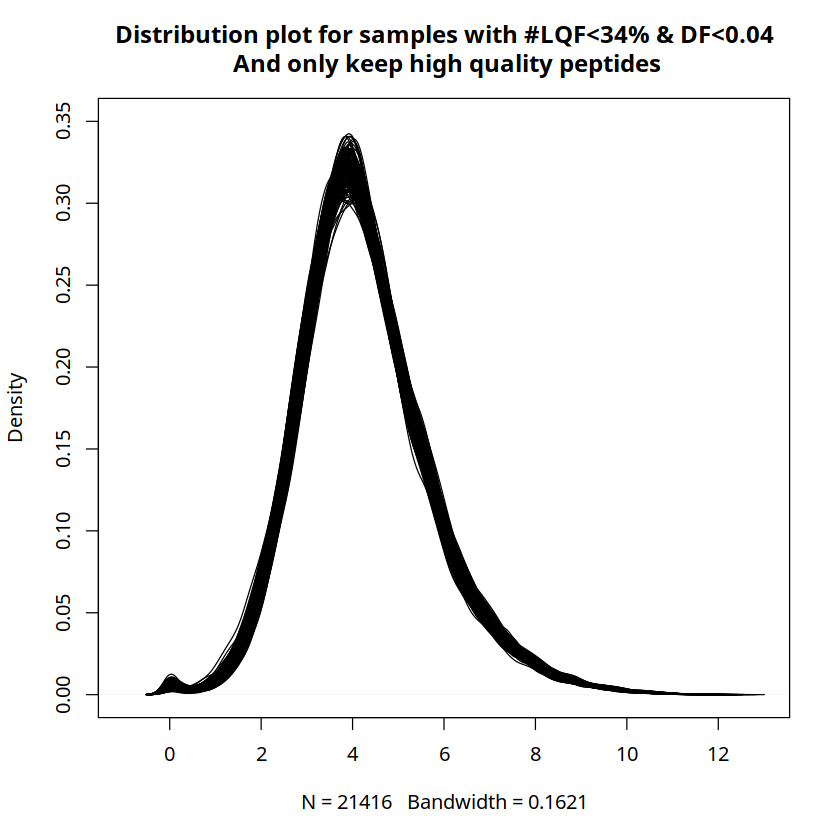

In [21]:
##Plot intensity distribution for samples with low quality peptide number <34% and distribution distance <0.04
##And also remove low quality peptides in samples
plot(density(log(peptide_intensity[,high_quality_sample_index_s2[1]][which(peptide_quality[,high_quality_sample_index_s2[1]]<=0.01)])), 
     xlim=c(-1, 13), ylim=c(0, 0.35), 
     main="Distribution plot for samples with #LQF<34% & DF<0.04\n And only good quality peptides")
for (i in high_quality_sample_index_s2){
    lines(density(log(peptide_intensity[,i][which(peptide_quality[,i]<=0.01)])))
}